### Ekaterina Siikavirta 10.11.2022

In [ ]:
import pandas as pd
#settings :
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  
import datatable as dt
import re

In [397]:
data = dt.fread('lessons_data_arrestee.csv').to_pandas()
data.head(1)

,DATA_YEAR_,ARRESTEE_ID_,INCIDENT_ID_,ARRESTEE_SEQ_NUM_,ARREST_DATE_,ARREST_TYPE_ID_,MULTIPLE_INDICATOR_,OFFENSE_TYPE_ID_,AGE_ID_,AGE_NUM_,SEX_CODE_,RACE_ID_,ETHNICITY_ID_,RESIDENT_CODE_,UNDER_18_DISPOSITION_CODE_,CLEARANCE_IND_,AGE_RANGE_LOW_NUM_,AGE_RANGE_HIGH_NUM_,ARREST_TYPE_CODE_,ARREST_TYPE_NAME_,AGENCY_ID_,NIBRS_MONTH_ID_,CARGO_THEFT_FLAG_,SUBMISSION_DATE_,INCIDENT_DATE_,REPORT_DATE_FLAG_,INCIDENT_HOUR_,CLEARED_EXCEPT_ID_,CLEARED_EXCEPT_DATE_,INCIDENT_STATUS_,DATA_HOME_,ORIG_FORMAT_,DID_,OFFENSE_CODE_,OFFENSE_NAME_,CRIME_AGAINST_,CT_FLAG_,HC_FLAG_,HC_CODE_,OFFENSE_CATEGORY_NAME_,OFFENSE_GROUP_,RACE_CODE_,RACE_DESC_,SORT_ORDER_,START_YEAR_,END_YEAR_,NOTES_
0,2020.0,41269812.0,133608918.0,3.0,29.Oct.20,3.0,N,21.0,5.0,21.0,M,2.0,2.0,N,,b'',21.0,0.0,T,Taken INTO Custody,13088.0,17497071.0,b'',28.Jan.21,25.Oct.20,b'',0.0,6.0,b'',0.0,C,X,92914094.0,240,Motor Vehicle Theft,Property,Y,Y,"7,,0",Motor Vehicle Theft,A,B,Black or African American,20.0,NaN,b'',


#### | Drop not needed columns |

In [398]:
data.drop(['AGENCY_ID_','SUBMISSION_DATE_','DID_','CT_FLAG_','HC_FLAG_','HC_CODE_','SORT_ORDER_','START_YEAR_','END_YEAR_','NOTES_','CLEARANCE_IND_','CARGO_THEFT_FLAG_','REPORT_DATE_FLAG_', 'CLEARED_EXCEPT_DATE_','UNDER_18_DISPOSITION_CODE_','INCIDENT_STATUS_','AGE_RANGE_HIGH_NUM_'], axis = 1, inplace = True)
data.head(1)

,DATA_YEAR_,ARRESTEE_ID_,INCIDENT_ID_,ARRESTEE_SEQ_NUM_,ARREST_DATE_,ARREST_TYPE_ID_,MULTIPLE_INDICATOR_,OFFENSE_TYPE_ID_,AGE_ID_,AGE_NUM_,SEX_CODE_,RACE_ID_,ETHNICITY_ID_,RESIDENT_CODE_,AGE_RANGE_LOW_NUM_,ARREST_TYPE_CODE_,ARREST_TYPE_NAME_,NIBRS_MONTH_ID_,INCIDENT_DATE_,INCIDENT_HOUR_,CLEARED_EXCEPT_ID_,DATA_HOME_,ORIG_FORMAT_,OFFENSE_CODE_,OFFENSE_NAME_,CRIME_AGAINST_,OFFENSE_CATEGORY_NAME_,OFFENSE_GROUP_,RACE_CODE_,RACE_DESC_
0,2020.0,41269812.0,133608918.0,3.0,29.Oct.20,3.0,N,21.0,5.0,21.0,M,2.0,2.0,N,21.0,T,Taken INTO Custody,17497071.0,25.Oct.20,0.0,6.0,C,X,240,Motor Vehicle Theft,Property,Motor Vehicle Theft,A,B,Black or African American


#### | Remove from all columns names the last '_' |

In [399]:
renamed_columns = [re.sub('_$','',i) for i in data.columns]
data.columns = renamed_columns
data.head(1)

,DATA_YEAR,ARRESTEE_ID,INCIDENT_ID,ARRESTEE_SEQ_NUM,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE,AGE_RANGE_LOW_NUM,ARREST_TYPE_CODE,ARREST_TYPE_NAME,NIBRS_MONTH_ID,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DATA_HOME,ORIG_FORMAT,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP,RACE_CODE,RACE_DESC
0,2020.0,41269812.0,133608918.0,3.0,29.Oct.20,3.0,N,21.0,5.0,21.0,M,2.0,2.0,N,21.0,T,Taken INTO Custody,17497071.0,25.Oct.20,0.0,6.0,C,X,240,Motor Vehicle Theft,Property,Motor Vehicle Theft,A,B,Black or African American


#### | Delete 500 empty rows |

First I check if all empty fiels are NaNs and notice that there are just some empty field without any data

In [400]:
data.tail(1)

,DATA_YEAR,ARRESTEE_ID,INCIDENT_ID,ARRESTEE_SEQ_NUM,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE,AGE_RANGE_LOW_NUM,ARREST_TYPE_CODE,ARREST_TYPE_NAME,NIBRS_MONTH_ID,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DATA_HOME,ORIG_FORMAT,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP,RACE_CODE,RACE_DESC
9821,NaN,NaN,NaN,NaN,,NaN,,NaN,NaN,NaN,,NaN,NaN,,NaN,,,NaN,,NaN,NaN,,,,,,,,,


I convert all empty fields to NaN

In [401]:
data = data.replace('',np.NaN)
data.tail(1)

,DATA_YEAR,ARRESTEE_ID,INCIDENT_ID,ARRESTEE_SEQ_NUM,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE,AGE_RANGE_LOW_NUM,ARREST_TYPE_CODE,ARREST_TYPE_NAME,NIBRS_MONTH_ID,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DATA_HOME,ORIG_FORMAT,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP,RACE_CODE,RACE_DESC
9821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Then I drop all rows where all values are NaNs

In [402]:
data.dropna(how='all', inplace = True)
data.tail(1)

,DATA_YEAR,ARRESTEE_ID,INCIDENT_ID,ARRESTEE_SEQ_NUM,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE,AGE_RANGE_LOW_NUM,ARREST_TYPE_CODE,ARREST_TYPE_NAME,NIBRS_MONTH_ID,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DATA_HOME,ORIG_FORMAT,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP,RACE_CODE,RACE_DESC
9321,2020.0,4.434324e+11,1.336098e+10,1.0,26.Jul.20,3.0,N,5.0,5.0,300.0,M,2.0,2.0,NaN,30.0,T,Taken INTO Custody,16606637.0,26.Jul.20,6.0,6.0,C,X,290,Destruction/Damage/Vandalism of Property,Property,Destruction/Damage/Vandalism of Property,A,B,Black or African American


<AxesSubplot:>

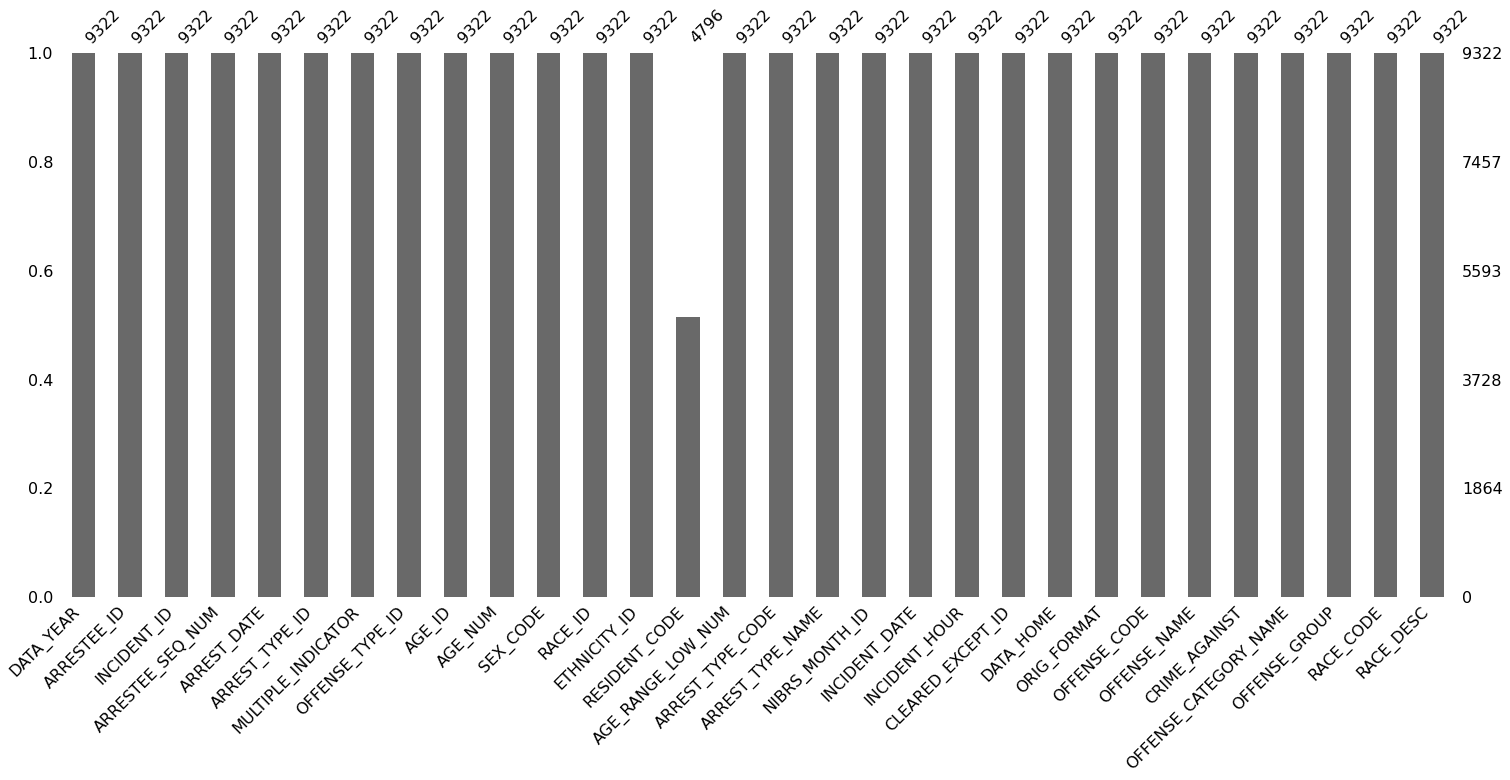

In [403]:
msno.bar(data)

#### | Remove the .0 fron the ARRESTEE_ID and the INCIDENT_ID |

I decided to convert not only ARRESTEE_ID and INCIDENT_ID to float but also other field where type should be int. 

In [404]:
def float_to_int(c):
    data[c] = data[c].astype(int)

In [405]:
float_to_int('ARRESTEE_ID')
float_to_int('INCIDENT_ID')
float_to_int('DATA_YEAR')
float_to_int('ARRESTEE_SEQ_NUM')
float_to_int('ARREST_TYPE_ID')
float_to_int('OFFENSE_TYPE_ID')
float_to_int('AGE_ID')
float_to_int('AGE_NUM')
float_to_int('RACE_ID')
float_to_int('ETHNICITY_ID')
float_to_int('AGE_RANGE_LOW_NUM')
float_to_int('NIBRS_MONTH_ID')
float_to_int('INCIDENT_HOUR')
float_to_int('CLEARED_EXCEPT_ID')

In [406]:
data.head(1)

,DATA_YEAR,ARRESTEE_ID,INCIDENT_ID,ARRESTEE_SEQ_NUM,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE,AGE_RANGE_LOW_NUM,ARREST_TYPE_CODE,ARREST_TYPE_NAME,NIBRS_MONTH_ID,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DATA_HOME,ORIG_FORMAT,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP,RACE_CODE,RACE_DESC
0,2020,41269812,133608918,3,29.Oct.20,3,N,21,5,21,M,2,2,N,21,T,Taken INTO Custody,17497071,25.Oct.20,0,6,C,X,240,Motor Vehicle Theft,Property,Motor Vehicle Theft,A,B,Black or African American


In [407]:
display(data.dtypes)

DATA_YEAR                 int64
ARRESTEE_ID               int64
INCIDENT_ID               int64
ARRESTEE_SEQ_NUM          int64
ARREST_DATE              object
ARREST_TYPE_ID            int64
MULTIPLE_INDICATOR       object
OFFENSE_TYPE_ID           int64
AGE_ID                    int64
AGE_NUM                   int64
SEX_CODE                 object
RACE_ID                   int64
ETHNICITY_ID              int64
RESIDENT_CODE            object
AGE_RANGE_LOW_NUM         int64
ARREST_TYPE_CODE         object
ARREST_TYPE_NAME         object
NIBRS_MONTH_ID            int64
INCIDENT_DATE            object
INCIDENT_HOUR             int64
CLEARED_EXCEPT_ID         int64
DATA_HOME                object
ORIG_FORMAT              object
OFFENSE_CODE             object
OFFENSE_NAME             object
CRIME_AGAINST            object
OFFENSE_CATEGORY_NAME    object
OFFENSE_GROUP            object
RACE_CODE                object
RACE_DESC                object
dtype: object

#### | Remove the duplicates of ARRESTEE_ID |

In [408]:
data.ARRESTEE_ID.value_counts()

3223337         2
41269812        1
41273686        1
41264001        1
41253370        1
               ..
39183394        1
41263989        1
39039834        1
38983935        1
443432424328    1
Name: ARRESTEE_ID, Length: 9321, dtype: int64

In [409]:
data = data.drop_duplicates(subset=['ARRESTEE_ID'], keep = False)
data.head(1)

,DATA_YEAR,ARRESTEE_ID,INCIDENT_ID,ARRESTEE_SEQ_NUM,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE,AGE_RANGE_LOW_NUM,ARREST_TYPE_CODE,ARREST_TYPE_NAME,NIBRS_MONTH_ID,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DATA_HOME,ORIG_FORMAT,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP,RACE_CODE,RACE_DESC
0,2020,41269812,133608918,3,29.Oct.20,3,N,21,5,21,M,2,2,N,21,T,Taken INTO Custody,17497071,25.Oct.20,0,6,C,X,240,Motor Vehicle Theft,Property,Motor Vehicle Theft,A,B,Black or African American


In [410]:
data.ARRESTEE_ID.value_counts()

41269812        1
41269629        1
41260833        1
41264001        1
41253370        1
               ..
41921382        1
39183394        1
41263989        1
39039834        1
443432424328    1
Name: ARRESTEE_ID, Length: 9320, dtype: int64

#### | Use groupby to check the columns have id and the description. Check if they match |

In [412]:
data.head(1)

,DATA_YEAR,ARRESTEE_ID,INCIDENT_ID,ARRESTEE_SEQ_NUM,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,RESIDENT_CODE,AGE_RANGE_LOW_NUM,ARREST_TYPE_CODE,ARREST_TYPE_NAME,NIBRS_MONTH_ID,INCIDENT_DATE,INCIDENT_HOUR,CLEARED_EXCEPT_ID,DATA_HOME,ORIG_FORMAT,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP,RACE_CODE,RACE_DESC
0,2020,41269812,133608918,3,29.Oct.20,3,N,21,5,21,M,2,2,N,21,T,Taken INTO Custody,17497071,25.Oct.20,0,6,C,X,240,Motor Vehicle Theft,Property,Motor Vehicle Theft,A,B,Black or African American


In [415]:
data['RACE_DESC'].replace(['Wh ite','Whi te'], 'White', inplace = True)
data['RACE_DESC'].replace(['Bla ck or African American','Black or African  American', 'Black or African Amer ican','Black or African Americ an'], 'Black or African American', inplace = True)

In [416]:
data.groupby(['RACE_ID','RACE_DESC']).size().reset_index(name='count')

,RACE_ID,RACE_DESC,count
0,0,Unknown,89
1,1,White,5792
2,2,Black or African American,3296
3,3,American Indian or Alaska Native,39
4,4,Asian,103
5,8,Native Hawaiian or Other Pacific Islander,1


In [455]:
data['ARREST_TYPE_NAME'].replace(['On Vieww','On Viiiew','On  View'], 'On View', inplace = True)
data['ARREST_TYPE_NAME'].replace(['Summoned  / Cited'], 'Summoned / Cited', inplace = True)
data['ARREST_TYPE_NAME'].replace(['Takenn  INTO Custody','Taken INTOO Custody','Taken INTO    Custody','Taken   INTO   Custody','Taken   INTO Custody','Taken  INTO   Custody','Taken INTO  Custody'], 'Taken INTO Custody', inplace = True)

It was hard to define how many empty spaces were in the string since in table below they all looked the same, so I had to print out all wrong names

In [458]:
wrong = data.loc[(data.ARREST_TYPE_ID == 3) & (data.ARREST_TYPE_NAME != 'Taken INTO Custody'),['ARREST_TYPE_NAME']]
# print(wrong)

In [456]:
data.groupby(['ARREST_TYPE_ID','ARREST_TYPE_NAME']).size().reset_index(name='count')

,ARREST_TYPE_ID,ARREST_TYPE_NAME,count
0,1,On View,3366
1,2,Summoned / Cited,894
2,3,Taken INTO Custody,5060


In [495]:
data['OFFENSE_NAME'].replace(['Agg ravated Assault'], 'Aggravated Assault', inplace = True)
data['OFFENSE_NAME'].replace(['S imple Assault','Simple As sault','Simple Ass ault','Simple Assa ult','Simple Assaul t'], 'Simple Assault', inplace = True)
data['OFFENSE_NAME'].replace(['Intimid ation'], 'Intimidation', inplace = True)
data['OFFENSE_NAME'].replace(['Burglary/Break ing & Entering','Bur glary/Breaking & Entering'], 'Burglary/Breaking & Entering', inplace = True)
data['OFFENSE_NAME'].replace(['Shopliftin g','Shoplif ting','Shopli fting'], 'Shoplifting', inplace = True)
data['OFFENSE_NAME'].replace(['All Other Larce ny','All Oth er Larceny'], 'All Other Larceny', inplace = True)
data['OFFENSE_NAME'].replace(['Motor V ehicle Theft','Motor Ve hicle Theft'], 'Motor Vehicle Theft', inplace = True)
data['OFFENSE_NAME'].replace(['Stolen Pr operty Offenses'], 'Stolen Property Offenses', inplace = True)
data['OFFENSE_NAME'].replace(['Destruction/ Damage /Va ndalism of Property','Destruction/Damage/Van dalism of Property','Destruct ion/Damage/Vandal ism of Property'], 'Destruction/Damage/Vandalism of Property', inplace = True)
data['OFFENSE_NAME'].replace(['Drug Equipment Violations','Drug/Narcotic Vi olations'], 'Drug/Narcotic Violations', inplace = True)
data['OFFENSE_NAME'].replace(['Wea pon Law Violations'], 'Weapon Law Violations', inplace = True)

In [496]:
data.groupby(['OFFENSE_CODE','OFFENSE_NAME']).size().reset_index(name='count')

,OFFENSE_CODE,OFFENSE_NAME,count
0,09A,Murder and Nonnegligent Manslaughter,11
1,100,Kidnapping/Abduction,60
2,11A,Rape,15
3,11B,Sodomy,12
4,11D,Fondling,63
5,120,Robbery,141
6,13A,Aggravated Assault,541
7,13B,Simple Assault,1548
8,13C,Intimidation,367
9,200,Arson,18


In [530]:
data['OFFENSE_CATEGORY_NAME'].replace(['Sex Offe nses'], 'Sex Offenses', inplace = True)
data['OFFENSE_CATEGORY_NAME'].replace(['Robber y','Rob bery'], 'Robbery', inplace = True)
data['OFFENSE_CATEGORY_NAME'].replace(['assault Offenses','Assa ult Offenses','Assault Offe nses','Assault Offense s','Ass ault Offenses','Assault Off enses','Assault O ffenses'], 'Assault Offenses', inplace = True)
data['OFFENSE_CATEGORY_NAME'].replace(['Ar son'], 'Arson', inplace = True)
data['OFFENSE_CATEGORY_NAME'].replace(['Burglary/Brevaking & Entering','Burg lary/Breaking & Entering'], 'Burglary/Breaking & Entering', inplace = True)
data['OFFENSE_CATEGORY_NAME'].replace(['Larce ny/Theft Offenses','Larceny/Theft Offensases','Larceny/Theft Off enses'], 'Larceny/Theft Offenses', inplace = True)
data['OFFENSE_CATEGORY_NAME'].replace(['Fra ud Offenses'], 'Fraud Offenses', inplace = True)
data['OFFENSE_CATEGORY_NAME'].replace(['Destruction/ Damage/Vandalism of Property','Destruc tion/Damage/Vandalism of Property','Destr uction/Damage/Va ndalism of Property'], 'Destruction/Damage/Vandalism of Property', inplace = True)
data['OFFENSE_CATEGORY_NAME'].replace(['Drug/Narcotic','Drug/N arcotic Offenses','Drug/ Narcotic Offenses'], 'Drug/Narcotic Offenses', inplace = True)

In [531]:
data.groupby(['OFFENSE_CODE','OFFENSE_CATEGORY_NAME']).size().reset_index(name='count')

,OFFENSE_CODE,OFFENSE_CATEGORY_NAME,count
0,09A,Homicide Offenses,11
1,100,Kidnapping/Abduction,60
2,11A,Sex Offenses,15
3,11B,Sex Offenses,12
4,11D,Sex Offenses,63
5,120,Robbery,141
6,13A,Assault Offenses,541
7,13B,Assault Offenses,1548
8,13C,Assault Offenses,367
9,200,Arson,18
